# sprint18課題 公開されている実装を動かす
# Faster R-CNN

In [0]:
# Google ドライブをマウントするには、このセルを実行してください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import sys
import os
from PIL import Image
import matplotlib.pyplot as plt

# 【問題1】学習と推定

Sprint16で読んだFaster R-CNN[1]の実装を動かします。  
[https://arxiv.org/pdf/1506.01497.pdf](https://arxiv.org/pdf/1506.01497.pdf)

以下のものを使用してください。Kerasを使用した実装です。  
[duckrabbits/ObjectDetection at master](https://github.com/duckrabbits/ObjectDetection/tree/master)

In [0]:
%cd /content/drive/My Drive/DIC/sprint18/ObjectDetection

/content/drive/My Drive/DIC/sprint18/ObjectDetection


In [0]:
%run train.py -p annotation.txt

Using TensorFlow backend.


Parsing annotation files


W0701 03:06:51.407390 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 03:06:51.419774 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 03:06:51.426506 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 03:06:51.462416 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20190701-022924_config.pickle
-------------------------------


W0701 03:06:53.076146 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0701 03:06:53.123248 140654946400128 deprecation_wrapper.py:119] From /content/drive/My Drive/DIC/sprint18/ObjectDetection/model/RoiPoolingConv.py:105: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.

W0701 03:06:53.565876 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0701 03:06:53.628008 140654946400128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 03:06:53.641958 140654946400128 deprecation_wrapper.py:119] From /usr

Epoch 1/200
100/100 [==============================] - 85s 846ms/step - rpn_cls: 2.6729 - rpn_regr: 0.2244 - detector_cls: 4.1195 - detector_regr: 4.4538
Average number of overlapping bounding boxes from RPN = 21.12 for 100 previous iterations
Mean number of bounding boxes from RPN overlapping ground truth boxes: 21.178217821782177
Classifier accuracy for bounding boxes from RPN: 0.535
Loss RPN classifier: 2.2909681865618508
Loss RPN regression: 0.15211578509770335
Loss Detector classifier: 3.096687262058258
Loss Detector regression: 1.9707494427263736
Elapsed time: 84.78761672973633[s]
Total loss decreased from inf to 7.510520676444186, saving weights
Epoch 2/200
100/100 [==============================] - 44s 445ms/step - rpn_cls: 1.9379 - rpn_regr: 0.1380 - detector_cls: 2.0948 - detector_regr: 0.5428
Mean number of bounding boxes from RPN overlapping ground truth boxes: 19.425742574257427
Classifier accuracy for bounding boxes from RPN: 0.55
Loss RPN classifier: 2.0275996602387605
L

## 推定ゾーン

In [0]:
%run predict.py -i simpsons_dataset/test_data -c ./save/train_20190701-022924_config.pickle

pic_0000.jpg
[]
Elapsed time = 7.478872060775757[s]
pic_0001.jpg
[]
Elapsed time = 0.716240406036377[s]
pic_0002.jpg
[]
Elapsed time = 0.7174525260925293[s]
pic_0003.jpg
[]
Elapsed time = 0.7049880027770996[s]
pic_0004.jpg
[]
Elapsed time = 0.713721752166748[s]
pic_0005.jpg
[]
Elapsed time = 0.696068525314331[s]
pic_0006.jpg
[('apu_nahasapeemapetilon', 71.25553488731384)]
Elapsed time = 0.6865589618682861[s]
pic_0007.jpg
[]
Elapsed time = 0.7616651058197021[s]
pic_0008.jpg
[]
Elapsed time = 0.6691012382507324[s]
pic_0009.jpg
[('abraham_grampa_simpson', 99.57032799720764), ('apu_nahasapeemapetilon', 69.44371461868286)]
Elapsed time = 0.73642897605896[s]
pic_0010.jpg
[('abraham_grampa_simpson', 99.7568428516388)]
Elapsed time = 0.7444703578948975[s]
pic_0011.jpg
[('abraham_grampa_simpson', 95.6684947013855)]
Elapsed time = 0.7393405437469482[s]
pic_0012.jpg
[('krusty_the_clown', 62.194591760635376)]
Elapsed time = 0.7396631240844727[s]
pic_0013.jpg
[('abraham_grampa_simpson', 97.67820239

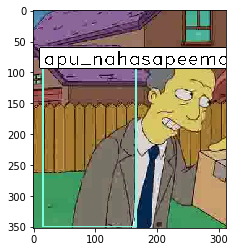

In [0]:
#coding:utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#Jupyterでインライン表示するための宣言
%matplotlib inline
#画像の読み込み
im = Image.open("output/result_pic_0006.jpg.png")
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

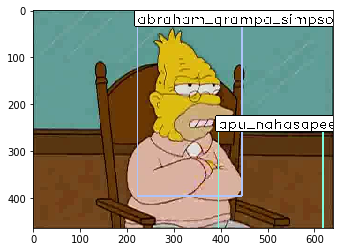

In [0]:
#coding:utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#Jupyterでインライン表示するための宣言
%matplotlib inline
#画像の読み込み
im = Image.open("output/result_pic_0009.jpg.png")
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

### 半分くらい出来ていない。。

# 【問題2】論文と実装の対応

コードリーディングを行ってください。  
まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。  
（例）  
- RPNを実現しているコードはどこか  
- RoIプーリングを実現しているコードはどこか  

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。  
オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。  
**参考**  
KerasではVGG16のクラスが用意されているため、簡単に利用ができます。  
include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。  
weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習が行えます。  
weights='None'とすればランダムな初期化となります。  
## RPNを実現しているコードはどこか

```python
#define the RPN, built on the base layers  
num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)  
rpn = nn.rpn(shared_layers, num_anchors) 
```


```python
# rpnの中身
def rpn(base_layers,num_anchors):
    x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)
    x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)  
    return [x_class, x_regr, base_layers]
```    
x_classとx_regrの２つを返している。

## RoIプーリングを実現しているコードはどこか

```python
# define the classifer, built on the base layers
classifier = nn.classifier(shared_layers, roi_input, C.num_rois, nb_classes=len(classes_count), trainable=True)
```

```python
def classifier(base_layers, input_rois, num_rois, nb_classes = 21, trainable=False):
    pooling_regions = 14
    input_shape = (num_rois,14,14,1024)
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])
    out = classifier_layers(out_roi_pool, input_shape=input_shape, trainable=True)
    out = TimeDistributed(Flatten())(out)
    out_class = TimeDistributed(Dense(nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(nb_classes))(out)
    # note: no regression target for bg class
    out_regr = TimeDistributed(Dense(4 * (nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(nb_classes))(out)
    return [out_class, out_regr]

```

# 【問題3】学習済みの重みによる推定

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。  
[qqwweee/keras-yolo3: A Keras implementation of YOLOv3(Tensorflow backend)](https://github.com/qqwweee/keras-yolo3)  

学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startに記載されています。  

まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。  

出力結果を課題の一部として提出してください。



In [0]:
%cd ../keras-yolo3-master

/content/drive/My Drive/DIC/sprint18/keras-yolo3-master


In [0]:
%run -i yolo_video.py --image

Using TensorFlow backend.
W0701 07:23:04.073379 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0701 07:23:04.074570 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0701 07:23:04.081067 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,


W0701 07:23:05.216599 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0701 07:23:05.225360 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 07:23:06.891493 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0701 07:23:12.418868 139788158740352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor in

model_data/yolo.h5 model, anchors, and classes loaded.


W0701 07:23:19.288320 139788158740352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Input image filename:img/yottan.jpg
(416, 416, 3)
Found 1 boxes for aaaimg
person 1.00 (5, 27) (423, 498)
aaaa
6.341962800001056
Input image filename:img/研修.jpeg
(416, 416, 3)
Found 4 boxes for aaaimg
person 0.40 (23, 81) (58, 134)
aaaa
person 0.50 (65, 83) (96, 151)
aaaa
person 0.64 (116, 82) (141, 153)
aaaa
person 0.69 (171, 75) (198, 147)
aaaa
0.0987363460008055
Input image filename:img/morning.jpeg
(416, 416, 3)
Found 11 boxes for aaaimg
cake 0.64 (304, 689) (448, 787)
aaaa
person 0.77 (341, 140) (510, 345)
aaaa
person 0.80 (432, 248) (564, 639)
aaaa
person 0.81 (514, 321) (672, 636)
aaaa
person 0.84 (565, 171) (703, 396)
aaaa
person 0.86 (296, 452) (487, 841)
aaaa
person 0.93 (190, 376) (354, 740)
aaaa
person 0.97 (318, 232) (451, 485)
aaaa
person 0.98 (92, 220) (338, 536)
aaaa
person 0.99 (447, 453) (720, 1010)
aaaa
person 1.00 (41, 511) (317, 956)
aaaa
0.4732353929975943


KeyboardInterrupt: ignored

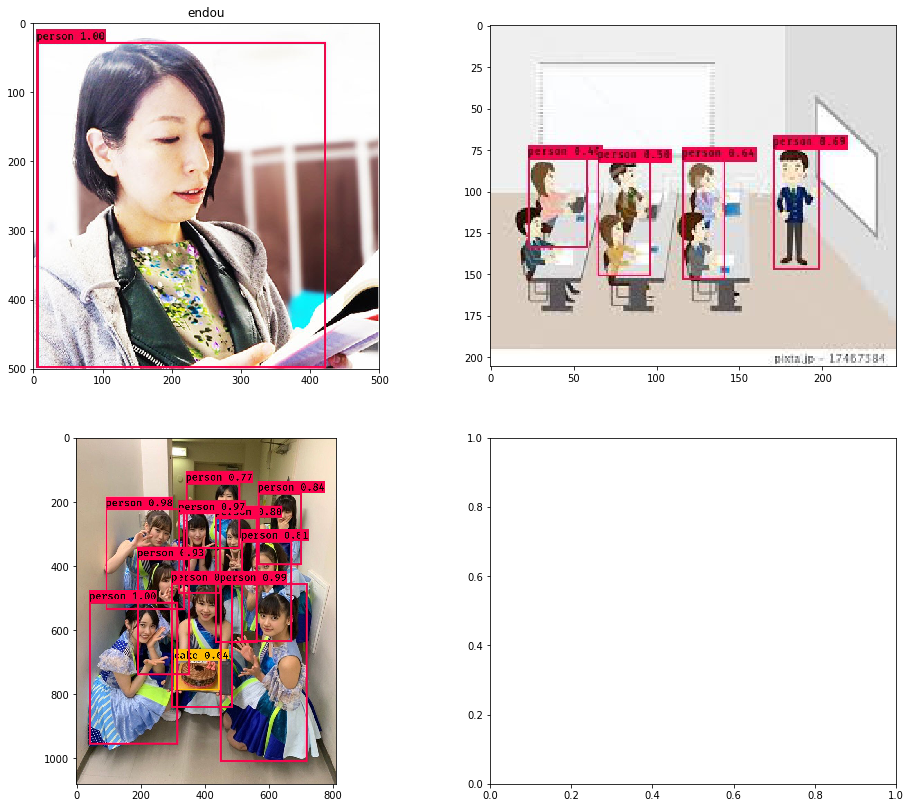

In [0]:
im1 = Image.open("img/yottan.jpg2.jpg", "r")
im2 = Image.open("img/研修.jpeg2.jpg", "r")
im3 = Image.open("img/morning.jpeg2.jpg", "r")

fig, ax = plt.subplots(2,2, figsize=(16,14))
ax[0,0].set_title('endou')
ax[0,0].imshow(np.array(im1))
ax[0,1].imshow(np.array(im2))
ax[1,0].imshow(np.array(im3))
plt.show()

endouさんは絶対人間

# 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingを読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。  

アノテーションファイルの形式がSprint18で扱った実装のものとは異なっているので、変換する必要があります。

In [0]:
%cd ../ObjectDetection

/content/drive/My Drive/DIC/sprint18/ObjectDetection


### アノテーションファイルを利用可能な状態に変換する。

In [0]:
train = pd.read_csv('annotation.txt' , header=None)
train.iloc[:,0] = '../ObjectDetection/'+train.iloc[:,0]
train

,0,1,2,3,4,5
0,../ObjectDetection/simpsons_dataset/abraham_gr...,57,72,52,72,abraham_grampa_simpson
1,../ObjectDetection/simpsons_dataset/abraham_gr...,80,31,337,354,abraham_grampa_simpson
2,../ObjectDetection/simpsons_dataset/abraham_gr...,128,48,285,407,abraham_grampa_simpson
3,../ObjectDetection/simpsons_dataset/abraham_gr...,72,126,158,275,abraham_grampa_simpson
4,../ObjectDetection/simpsons_dataset/abraham_gr...,123,61,294,416,abraham_grampa_simpson
5,../ObjectDetection/simpsons_dataset/abraham_gr...,115,18,498,413,abraham_grampa_simpson
6,../ObjectDetection/simpsons_dataset/abraham_gr...,171,47,423,413,abraham_grampa_simpson
7,../ObjectDetection/simpsons_dataset/abraham_gr...,120,53,381,409,abraham_grampa_simpson
8,../ObjectDetection/simpsons_dataset/abraham_gr...,149,56,398,406,abraham_grampa_simpson
9,../ObjectDetection/simpsons_dataset/abraham_gr...,205,41,470,456,abraham_grampa_simpson


In [0]:
label =  train[5].unique()
label

array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
       'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
       'edna_krabappel', 'homer_simpson', 'kent_brockman',
       'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
       'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
       'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
le = le.fit(train[5])
#ラベルを整数に変換
train[5] = le.transform(train[5])
train

,0,1,2,3,4,5
0,../ObjectDetection/simpsons_dataset/abraham_gr...,57,72,52,72,0
1,../ObjectDetection/simpsons_dataset/abraham_gr...,80,31,337,354,0
2,../ObjectDetection/simpsons_dataset/abraham_gr...,128,48,285,407,0
3,../ObjectDetection/simpsons_dataset/abraham_gr...,72,126,158,275,0
4,../ObjectDetection/simpsons_dataset/abraham_gr...,123,61,294,416,0
5,../ObjectDetection/simpsons_dataset/abraham_gr...,115,18,498,413,0
6,../ObjectDetection/simpsons_dataset/abraham_gr...,171,47,423,413,0
7,../ObjectDetection/simpsons_dataset/abraham_gr...,120,53,381,409,0
8,../ObjectDetection/simpsons_dataset/abraham_gr...,149,56,398,406,0
9,../ObjectDetection/simpsons_dataset/abraham_gr...,205,41,470,456,0


In [0]:
train[0] = train[[0,1]].apply(lambda x: '{} {}'.format(x[0],x[1]), axis=1)

In [0]:
train = train.drop(1, axis=1)
train

,0,2,3,4,5
0,../ObjectDetection/simpsons_dataset/abraham_gr...,72,52,72,0
1,../ObjectDetection/simpsons_dataset/abraham_gr...,31,337,354,0
2,../ObjectDetection/simpsons_dataset/abraham_gr...,48,285,407,0
3,../ObjectDetection/simpsons_dataset/abraham_gr...,126,158,275,0
4,../ObjectDetection/simpsons_dataset/abraham_gr...,61,294,416,0
5,../ObjectDetection/simpsons_dataset/abraham_gr...,18,498,413,0
6,../ObjectDetection/simpsons_dataset/abraham_gr...,47,423,413,0
7,../ObjectDetection/simpsons_dataset/abraham_gr...,53,381,409,0
8,../ObjectDetection/simpsons_dataset/abraham_gr...,56,398,406,0
9,../ObjectDetection/simpsons_dataset/abraham_gr...,41,470,456,0


In [0]:
train.to_csv('train.txt', sep=',', header=False, index=False)

In [0]:
pd.DataFrame(label).to_csv('classes.txt', header=False, index=False)

# 【問題5】学習
問題2で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [0]:
%cd ../keras-yolo3-master
%run convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

In [0]:
%run -i train.py

Create YOLOv3 model with 9 anchors and 18 classes.
Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.
Train on 7101 samples, val on 788 samples, with batch size 32.
Epoch 1/3
221/221 [==============================] - 581s 3s/step - loss: 960.9006 - val_loss: 5791.5171
Epoch 2/3
221/221 [==============================] - 537s 2s/step - loss: 112.0202 - val_loss: 5684.0716
Epoch 3/3
221/221 [==============================] - 533s 2s/step - loss: 66.0787 - val_loss: 5568.9770
Unfreeze all of the layers.
Train on 7101 samples, val on 788 samples, with batch size 32.
Epoch 4/6


ResourceExhaustedError: ignored

途中でResourceExhaustedErrorとなったので終了